# Step 1 - Reading the Dataset
Load the previously preprocessed dataset saved in the CSV file “data_refined.csv” into a Pandas DataFrame.
Hint: make sure you completed the accumulative project for Module 1.

In [6]:
import pandas as pd
df=pd.read_csv('data_refined.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# Step 2 - Feature Selection
Choosing only the most important features for training your classifier is one of the most important steps of the machine learning process. This can be done in many ways.
One of the simplest approaches is choosing the features with the highest correlation to the target data.

The label in this case is the ‘Diagnosed’ column.

The Diagnosed column has two distinct values:
* M: Malignant Tumor
* B: Benign Tumor

1. Calculate the correlation of all the features to their target labels.
2. Choose the most correlated features above a certain limit for training.
3. Output a list of important feature names.

In [7]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

#Filter correlations above the threshold
threshold = 0.993
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1) & (correlation_matrix > -1)

#Identify correlated features:
correlated_features = set()
for col in high_correlations:
    correlated_features.update(high_correlations.index[high_correlations[col]])

#Print or use the correlated features
print("Correlated features above threshold:", correlated_features)

print(type(correlated_features))

Correlated features above threshold: {'radius_mean', 'perimeter_mean', 'perimeter_worst', 'radius_worst'}
<class 'set'>


<Axes: >

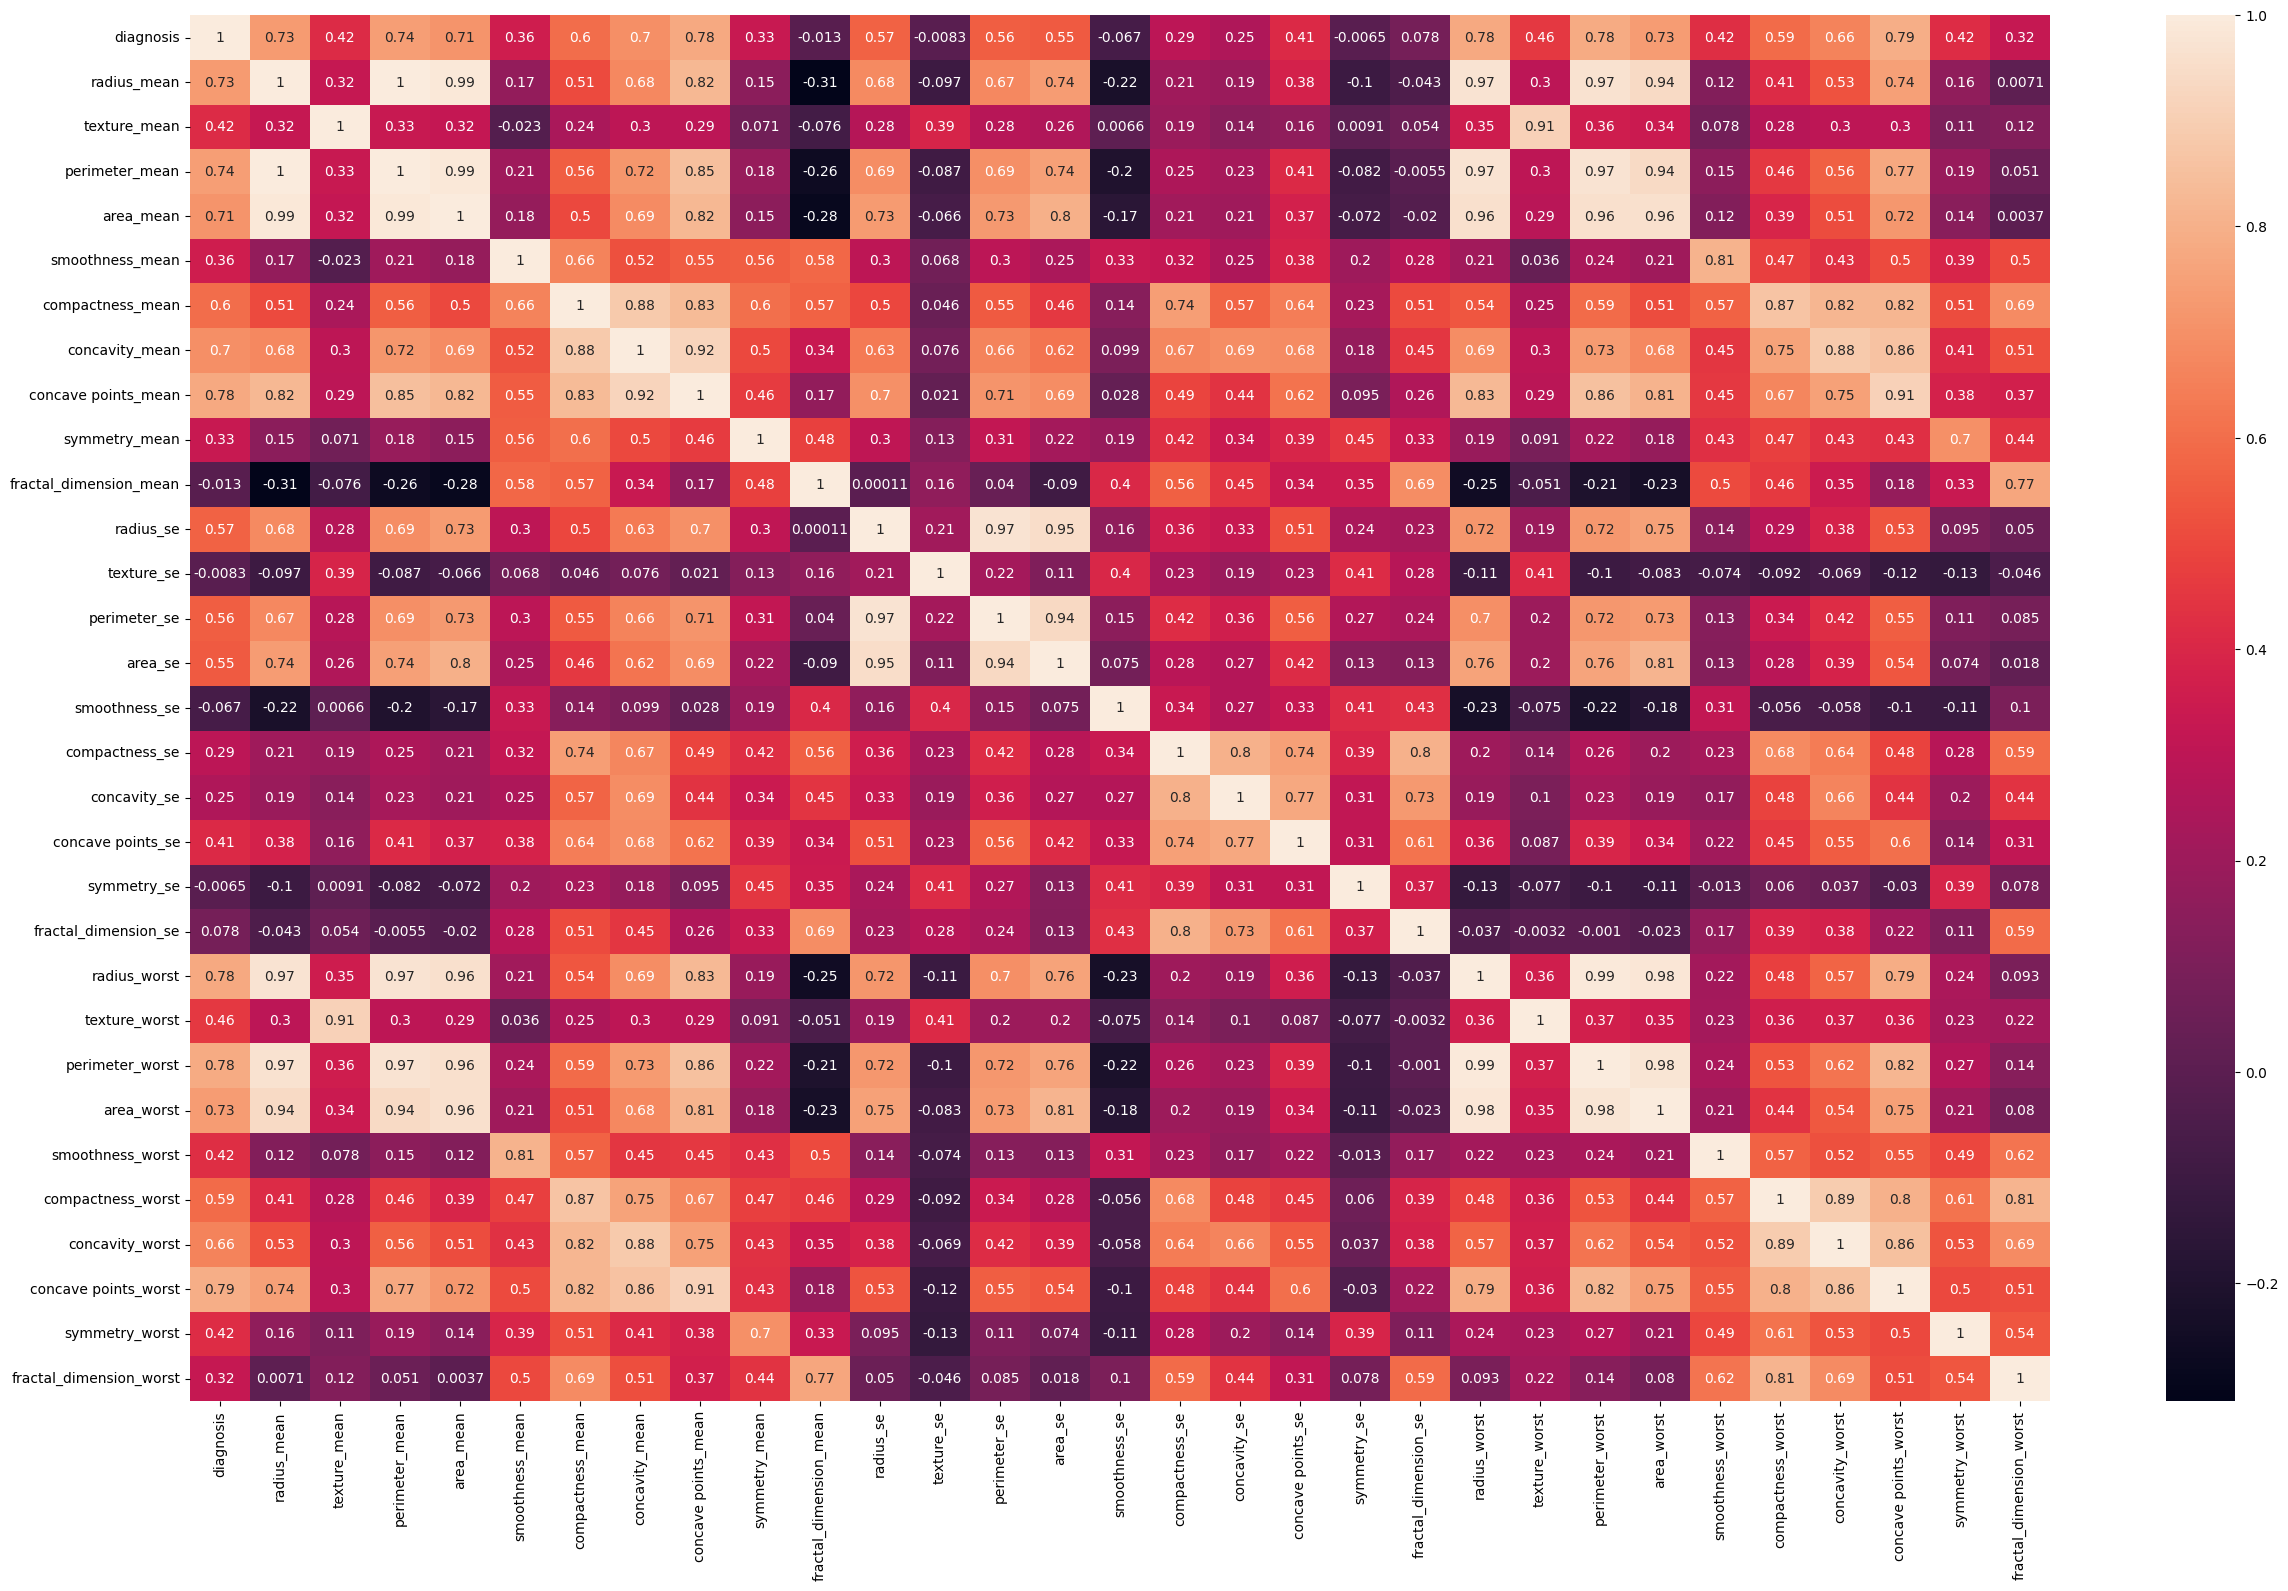

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot=True)

# Step 3 - Splitting the Data

Split your data as follows:
* 80% training set
* 10% validation set
* 10% test set

In [9]:
#target data
y = df["diagnosis"].values

#model train / test data
X = df[correlated_features].values

#training the model on x and y, 80% for training, 20% for testing (ie: 0.2), random state = 0 for consistant results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#populating X_validate, Y_validate as test set, using 0.5 to keep half for testing
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

#verifying that its split up correctly (455, 57, 57) ie: 80% train, 10% test, 10% validate
print(len(X_train), len(X_test), len(X_validate))

455 57 57


C:\Users\vvanden\AppData\Local\Temp\ipykernel_12212\520328816.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[correlated_features].values


# Step 4 - Training Classifiers

Use the following models to train your data:
1. KNN classifier
2. Random forest classifier
3. Support vector classifier (SVC)

Train your full features dataset and your reduced set features dataset.

Get accuracy scores and confusion matrices for both. You need a minimum accuracy score of 94%.

Compare the results.

Hint: you need to choose the optimal value for k using cross validation.

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'RFC': RandomForestClassifier(n_estimators=6,criterion="gini"),
    'SVC': SVC(C=1, kernel='rbf', gamma="scale")
}

# Train classifiers and evaluate performance
for name, clf in classifiers.items():
    if name == 'KNN':
        clf.fit(X_train, y_train)
    elif name == 'RFC':
        clf.fit(X_train, y_train)
    elif name == 'SVC':
        clf.fit(X_train, y_train)
    else:
        exit
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

# Compare results and select the best classifier

KNN Accuracy: 0.95
RFC Accuracy: 0.96
SVC Accuracy: 0.95
